In [ ]:
!pip install soundfile
!pip install librosa==0.8.0
!pip install scipy==1.5.2
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display as display
import librosa.feature
import soundfile as sf
from scipy.signal import resample
import os
import sys
import torch
import cv2
import random
import math

     |████████████████████████████████| 25.9MB 48.9MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1


# Data Download

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!wget https://www.openslr.org/resources/12/train-clean-100.tar.gz
!tar -xf train-clean-100.tar.gz
!mv LibriSpeech/ LibriSpeechTrain/

--2021-02-11 03:30:32--  https://www.openslr.org/resources/12/train-clean-100.tar.gz
Resolving www.openslr.org (www.openslr.org)... 46.101.158.64
Connecting to www.openslr.org (www.openslr.org)|46.101.158.64|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6387309499 (5.9G) [application/x-gzip]
Saving to: ‘train-clean-100.tar.gz’

train-clean-100.tar 100%[===================>]   5.95G  25.7MB/s    in 3m 35s  

2021-02-11 03:34:07 (28.3 MB/s) - ‘train-clean-100.tar.gz’ saved [6387309499/6387309499]



In [ ]:
!wget https://www.openslr.org/resources/12/test-clean.tar.gz
!tar -xf test-clean.tar.gz
!mv LibriSpeech/ LibriSpeechTest/

--2021-02-15 20:06:03--  https://www.openslr.org/resources/12/test-clean.tar.gz
Resolving www.openslr.org (www.openslr.org)... 46.101.158.64
Connecting to www.openslr.org (www.openslr.org)|46.101.158.64|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 346663984 (331M) [application/x-gzip]
Saving to: ‘test-clean.tar.gz’

test-clean.tar.gz   100%[===================>] 330.60M  29.1MB/s    in 12s     

2021-02-15 20:06:15 (27.3 MB/s) - ‘test-clean.tar.gz’ saved [346663984/346663984]



In [43]:
!wget isophonics.net/files/irs/classroomOmni.zip
!unzip classroomOmni
!mv Omni/ ClassroomOmni/

--2021-02-15 23:50:35--  http://isophonics.net/files/irs/classroomOmni.zip
Resolving isophonics.net (isophonics.net)... 138.37.95.150
Connecting to isophonics.net (isophonics.net)|138.37.95.150|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 54246190 (52M) [application/zip]
Saving to: ‘classroomOmni.zip’

classroomOmni.zip   100%[===================>]  51.73M   550KB/s    in 81s     

2021-02-15 23:51:57 (651 KB/s) - ‘classroomOmni.zip’ saved [54246190/54246190]

Archive:  classroomOmni.zip
replace LICENSE? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: LICENSE                 
   creating: Omni/
  inflating: Omni/40x10y.wav         
  inflating: Omni/60x25y.wav         
  inflating: Omni/30x35y.wav         
  inflating: Omni/25x45y.wav         
  inflating: Omni/15x15y.wav         
  inflating: Omni/05x25y.wav         
  inflating: Omni/30x15y.wav         
  inflating: Omni/35x30y.wav         
  inflating: Omni/30x10y.wav         
  inflating: Omni/10x15

In [ ]:
!wget isophonics.net/files/irs/octagonOmni.zip
!unzip octagonOmni
!mv Omni/ OctagonOmni/

--2021-02-14 20:39:16--  http://isophonics.net/files/irs/octagonOmni.zip
Resolving isophonics.net (isophonics.net)... 138.37.95.150
Connecting to isophonics.net (isophonics.net)|138.37.95.150|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 69523911 (66M) [application/zip]
Saving to: ‘octagonOmni.zip’

octagonOmni.zip     100%[===================>]  66.30M  20.9MB/s    in 3.9s    

2021-02-14 20:39:21 (16.9 MB/s) - ‘octagonOmni.zip’ saved [69523911/69523911]

Archive:  octagonOmni.zip
replace LICENSE? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: LICENSE                 
   creating: Omni/
  inflating: Omni/x04y06.wav         
  inflating: Omni/x04y12.wav         
  inflating: Omni/x01y07.wav         
  inflating: Omni/x01y06.wav         
  inflating: Omni/x06y03.wav         
  inflating: Omni/x08y04.wav         
  inflating: Omni/x02y05.wav         
  inflating: Omni/x05y02.wav         
  inflating: Omni/x10y05.wav         
  inflating: Omni/x03y12.wav  

In [ ]:
!wget isophonics.net/files/irs/greathallOmni.zip
!unzip greathallOmni
!mv Omni/ GreatHallOmni/

--2021-02-15 21:33:49--  http://isophonics.net/files/irs/greathallOmni.zip
Resolving isophonics.net (isophonics.net)... 138.37.95.150
Connecting to isophonics.net (isophonics.net)|138.37.95.150|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 70938816 (68M) [application/zip]
Saving to: ‘greathallOmni.zip’

greathallOmni.zip   100%[===================>]  67.65M   972KB/s    in 94s     

2021-02-15 21:35:23 (739 KB/s) - ‘greathallOmni.zip’ saved [70938816/70938816]

Archive:  greathallOmni.zip
  inflating: LICENSE                 
   creating: Omni/
  inflating: Omni/x04y06.wav         
  inflating: Omni/x04y12.wav         
  inflating: Omni/x01y07.wav         
  inflating: Omni/x01y06.wav         
  inflating: Omni/x06y03.wav         
  inflating: Omni/x08y04.wav         
  inflating: Omni/x02y05.wav         
  inflating: Omni/x05y02.wav         
  inflating: Omni/x10y05.wav         
  inflating: Omni/x03y12.wav         
  inflating: Omni/x04y04.wav         
  in

In [ ]:
!ls

drive	       greathallOmni.zip  LICENSE      test-clean.tar.gz
GreatHallOmni  LibriSpeechTest	  sample_data


# Common Functionalities

In [ ]:
def extract_audio(filename):
    """
    Extract audio given the filename (.wav, .flac, etc format)
    """

    audio, rate = sf.read(filename, always_2d=True)
    audio = np.reshape(audio, (1,-1))
    audio = audio[0]
    
    time = []
    t=0
    for i in range(len(audio)):
        time.append(t)
        t+=1/rate
    return audio, time, rate

def generate_spec(audio_sequence, rate, n_fft=2048, hop_length=512):
    """
    Generate spectrogram using librosa
    audio_sequence: list representing waveform
    rate: sampling rate (16000 for all LibriSpeech audios)
    nfft and hop_length: stft parameters
    """
    S = librosa.feature.melspectrogram(audio_sequence, sr=rate, n_fft=n_fft, hop_length=hop_length, n_mels=128, fmin=20, fmax=8300)
    log_spectra = librosa.power_to_db(S, ref=np.mean, top_db=80)
    return log_spectra

def zero_pad(x, k):
    """
    add k zeros to x signal
    """
    return np.append(x, np.zeros(k))

def awgn(signal, regsnr):
    """
    add random noise to signal 
    regsnr: signal to noise ratio
    """
    sigpower = sum([math.pow(abs(signal[i]),2) for i in range(len(signal))])
    sigpower = sigpower/len(signal)
    noisepower = sigpower/(math.pow(10, regsnr/10))
    sample = np.random.normal(0, 1, len(signal))
    noise = math.sqrt(noisepower)*sample
    return noise

def discrete_conv(x, h, x_fs, h_fs, snr = 30, aug_factor = 1):
    
    """
    Convolution using fft
    x: speech waveform
    h: RIR waveform
    x_fs: speech signal sampling rate (if is not 16000 the signal will be resampled)
    h_fs: RIR signal sampling rate (if is not 16000 the signal will be resampled)

    Based on https://github.com/vtolani95/convolution/blob/master/reverb.py
    """
    
    numSamples_h=round(len(h)/h_fs*16000)
    numSamples_x=round(len(x)/x_fs*16000)
    
    if h_fs!=16000:
      h = resample(h, numSamples_h)
    
    if x_fs!=16000:
      x = resample(x, numSamples_x)

    L, P = len(x), len(h)
    h_zp = zero_pad(h, L-1)
    x_zp = zero_pad(x, P-1)
    X = np.fft.fft(x_zp)
    output = np.fft.ifft(X * np.fft.fft(h_zp)).real
    output = aug_factor*output + x_zp
    output = output + awgn(output, snr)
    return output

In [ ]:
def train_data(audio_dir, rir_dir, lower_bound, upper_bound, checkpointX, checkpointY):
    """
    Read training data generating reverberant waveforms and spectrograms
   
    audio_dir: directory containing the speech audio files
    rir_dir: directory containing RIRs audio files
    lower_bound: initial example to be considered
    upper_bound: final example to be considered
    checkpointX: directory + filename to save reverberant data
    checkpointY: directory + filename to save target data 
    """

    sys.path.append(audio_dir)
    sys.path.append(rir_dir)
    
    rir_file_names = []
    for subdir, dirs, files in os.walk(rir_dir):
        for file in files:
            if (".wav" in file):
                rir_file_names.append(os.path.join(subdir,file))

    audio_file_names = []
    for subdir, dirs, files in os.walk(audio_dir):
        for file in files:
            if (".flac" in file):
                audio_file_names.append(os.path.join(subdir,file))
    
    print ("RIRs found: " + str(len(rir_file_names)))
    print ("Audio files found: " + str(len(audio_file_names)))
    time_size = 340
    frequency_size = 128
    X = torch.zeros((upper_bound-lower_bound, 1, frequency_size, time_size))
    y = torch.zeros((upper_bound-lower_bound, 1, frequency_size, time_size))
    for i in range(lower_bound, upper_bound):
        rir_index = random.sample(range(len(rir_file_names)), 1)[0]
        ir_audio, ir_time, ir_rate = extract_audio(rir_file_names[rir_index])

        speech_audio, speech_time, speech_rate = extract_audio(audio_file_names[i])
        speech_spec = generate_spec(speech_audio, speech_rate)
        
        random_snr = random.sample(range(15, 36), 1)[0]
        speech_rev = discrete_conv(speech_audio, ir_audio, 16000, 96000, snr = random_snr)
        speech_rev = speech_rev[0:len(speech_audio)]
        rev_spec = generate_spec(speech_rev, speech_rate)
        
        speech_spec = cv2.resize(speech_spec, dsize = (time_size, frequency_size), interpolation = cv2.INTER_LANCZOS4)
        rev_spec = cv2.resize(rev_spec, dsize = (time_size, frequency_size), interpolation = cv2.INTER_LANCZOS4)

        print("Proccesing audio file n°: " + str(i+1))
        X[i-lower_bound, 0, :, :] = torch.tensor(rev_spec)
        y[i-lower_bound, 0, :, :] = torch.tensor(speech_spec)

        if ((i+1)%500 == 0):
          torch.save(X, checkpointX)
          torch.save(y, checkpointY)
          print('Saved data')

    return X, y

In [ ]:
rir_rootdir1 = 'GreatHallOmni/'
audio_rootdir1 = 'LibriSpeechTrain/'
checkpointX1 = '/content/drive/My Drive/audio2/X_train_1'
checkpointY1 = '/content/drive/My Drive/audio2/y_train_1'
_, _ = train_data(audio_rootdir1, rir_rootdir1, 0, 5000, checkpointX1, checkpointY1)

Se truncaron las últimas líneas 5000 del resultado de transmisión.
Procesado archivo de audio n°: 11
Procesado archivo de audio n°: 12
Procesado archivo de audio n°: 13
Procesado archivo de audio n°: 14
Procesado archivo de audio n°: 15
Procesado archivo de audio n°: 16
Procesado archivo de audio n°: 17
Procesado archivo de audio n°: 18
Procesado archivo de audio n°: 19
Procesado archivo de audio n°: 20
Procesado archivo de audio n°: 21
Procesado archivo de audio n°: 22
Procesado archivo de audio n°: 23
Procesado archivo de audio n°: 24
Procesado archivo de audio n°: 25
Procesado archivo de audio n°: 26
Procesado archivo de audio n°: 27
Procesado archivo de audio n°: 28
Procesado archivo de audio n°: 29
Procesado archivo de audio n°: 30
Procesado archivo de audio n°: 31
Procesado archivo de audio n°: 32
Procesado archivo de audio n°: 33
Procesado archivo de audio n°: 34
Procesado archivo de audio n°: 35
Procesado archivo de audio n°: 36
Procesado archivo de audio n°: 37
Procesado archi

In [ ]:
rir_rootdir2 = 'OctagonOmni/'
audio_rootdir2 = 'LibriSpeechTrain/'
checkpointX2 = '/content/drive/My Drive/data_audio/X_train_2'
checkpointY2 = '/content/drive/My Drive/data_audio/y_train_2'
_, _ = train_data(audio_rootdir2, rir_rootdir2, 5000, 10000, checkpointX2, checkpointY2)

rir_rootdir3 = 'GreatHallOmni/'
audio_rootdir3 = 'LibriSpeechTrain/'
checkpointX3 = '/content/drive/My Drive/audio2/X_train_3'
checkpointY3 = '/content/drive/My Drive/audio2/y_train_3'
_, _ = train_data(audio_rootdir3, rir_rootdir3, 10000, 15000, checkpointX3, checkpointY3)

rir_rootdir4 = 'OctagonOmni/'
audio_rootdir4 = 'LibriSpeechTrain/'
checkpointX4 = '/content/drive/My Drive/data_audio/X_train_4'
checkpointY4 = '/content/drive/My Drive/data_audio/y_train_4'
_, _ = train_data(audio_rootdir4, rir_rootdir4, 15000, 20000, checkpointX4, checkpointY4)

Se truncaron las últimas líneas 5000 del resultado de transmisión.
Procesado archivo de audio n°: 15011
Procesado archivo de audio n°: 15012
Procesado archivo de audio n°: 15013
Procesado archivo de audio n°: 15014
Procesado archivo de audio n°: 15015
Procesado archivo de audio n°: 15016
Procesado archivo de audio n°: 15017
Procesado archivo de audio n°: 15018
Procesado archivo de audio n°: 15019
Procesado archivo de audio n°: 15020
Procesado archivo de audio n°: 15021
Procesado archivo de audio n°: 15022
Procesado archivo de audio n°: 15023
Procesado archivo de audio n°: 15024
Procesado archivo de audio n°: 15025
Procesado archivo de audio n°: 15026
Procesado archivo de audio n°: 15027
Procesado archivo de audio n°: 15028
Procesado archivo de audio n°: 15029
Procesado archivo de audio n°: 15030
Procesado archivo de audio n°: 15031
Procesado archivo de audio n°: 15032
Procesado archivo de audio n°: 15033
Procesado archivo de audio n°: 15034
Procesado archivo de audio n°: 15035
Procesad

In [ ]:
def test_data(audio_dir, rir_dir, lower_bound, upper_bound, checkpoints, noise = [15, 35]):

    """
    read test data generating reverberant spectrograms and waveforms
    
    audio_dir: directory containing speech audio files
    rir_dir: directory
    lower_bound: initial example to be considered
    upper_bound: final example to be considered
    checkpoints: list containing directories for save rev spectrogram, target spectrogram
                rev waveforms and target waveforms respectively
    noise: add noise with random snr in [noise[0], noise[1]]
    """
    
    checkpointX = checkpoints[0]
    checkpointY = checkpoints[1]
    checkpoint_waverev = checkpoints[2]
    checkpoint_wavetarget = checkpoints[3]
    
    sys.path.append(audio_dir)
    sys.path.append(rir_dir)
    
    rir_file_names = []
    for subdir, dirs, files in os.walk(rir_dir):
        for file in files:
            if (".wav" in file):
                rir_file_names.append(os.path.join(subdir,file))

    audio_file_names = []
    for subdir, dirs, files in os.walk(audio_dir):
        for file in files:
            if (".flac" in file):
                audio_file_names.append(os.path.join(subdir,file))
    
    print ("RIRs found: " + str(len(rir_file_names)))
    print ("Audio files found: " + str(len(audio_file_names)))
    time_size = 340
    frequency_size = 128
    X = torch.zeros((upper_bound-lower_bound, 1, frequency_size, time_size))
    y = torch.zeros((upper_bound-lower_bound, 1, frequency_size, time_size))

    wave_data = []
    wave_targets = []


    for i in range(lower_bound, upper_bound):
        rir_index = random.sample(range(len(rir_file_names)), 1)[0]
        ir_audio, ir_time, ir_rate = extract_audio(rir_file_names[rir_index])

        speech_audio, speech_time, speech_rate = extract_audio(audio_file_names[i])
        wave_targets.append(speech_audio)
        speech_spec = generate_spec(speech_audio, speech_rate)
        
        random_snr = random.sample(range(noise[0], noise[1]), 1)[0]
        speech_rev = discrete_conv(speech_audio, ir_audio, 16000, 96000, snr = random_snr)
        speech_rev = speech_rev[0:len(speech_audio)]
        wave_data.append(speech_rev)
        rev_spec = generate_spec(speech_rev, speech_rate)
        
        speech_spec = cv2.resize(speech_spec, dsize = (time_size, frequency_size), interpolation = cv2.INTER_LANCZOS4)
        rev_spec = cv2.resize(rev_spec, dsize = (time_size, frequency_size), interpolation = cv2.INTER_LANCZOS4)

        print("Proccesing audio file n°: " + str(i+1))
        X[i-lower_bound, 0, :, :] = torch.tensor(rev_spec)
        y[i-lower_bound, 0, :, :] = torch.tensor(speech_spec)

        if ((i+1)%500 == 0):
          torch.save(X, checkpointX)
          torch.save(y, checkpointY)
          torch.save(wave_data, checkpoint_waverev)
          torch.save(wave_targets, checkpoint_wavetarget)
          print('Saved data')

    return X, y

In [ ]:
def mardy_test_data(audio_dir, rir_dir, lower_bound, upper_bound, checkpoints, snr = 30, distance = 'far'):

    """
    read test data generating reverberant spectrograms and waveforms
    
    audio_dir: directory containing speech audio files
    rir_dir: directory contaning MARDY RIRs
    lower_bound: initial example to be considered
    upper_bound: final example to be considered
    checkpoints: list containing directories for save rev spectrogram, target spectrogram
                rev waveforms and target waveforms respectively
    snr: add awgn with snr
    """
    
    checkpointX = checkpoints[0]
    checkpointY = checkpoints[1]
    checkpoint_waverev = checkpoints[2]
    checkpoint_wavetarget = checkpoints[3]
    
    sys.path.append(audio_dir)
    sys.path.append(rir_dir)

    num_distance = '3' if distance == 'far' else '1'
    print('Distance Microphones ' + num_distance)
    
    rir_file_names = []
    for subdir, dirs, files in os.walk(rir_dir):
        for file in files:
            if (".wav" in file and file[3]==num_distance):
                rir_file_names.append(os.path.join(subdir,file))

    audio_file_names = []
    for subdir, dirs, files in os.walk(audio_dir):
        for file in files:
            if (".flac" in file):
                audio_file_names.append(os.path.join(subdir,file))
    
    print ("RIRs found: " + str(len(rir_file_names)))
    print ("Audio files found: " + str(len(audio_file_names)))
    time_size = 340
    frequency_size = 128
    X = torch.zeros((upper_bound-lower_bound, 1, frequency_size, time_size))
    y = torch.zeros((upper_bound-lower_bound, 1, frequency_size, time_size))

    wave_data = []
    wave_targets = []


    for i in range(lower_bound, upper_bound):
        rir_index = random.sample(range(len(rir_file_names)), 1)[0]
        ir_audio, ir_time, ir_rate = extract_audio(rir_file_names[rir_index])

        speech_audio, speech_time, speech_rate = extract_audio(audio_file_names[i])
        wave_targets.append(speech_audio)
        speech_spec = generate_spec(speech_audio, speech_rate)
        speech_rev = discrete_conv(speech_audio, ir_audio, 16000, 48000, aug_factor = 10, snr = snr)
        speech_rev = speech_rev[0:len(speech_audio)]
        wave_data.append(speech_rev)
        rev_spec = generate_spec(speech_rev, speech_rate)
        
        speech_spec = cv2.resize(speech_spec, dsize = (time_size, frequency_size), interpolation = cv2.INTER_LANCZOS4)
        rev_spec = cv2.resize(rev_spec, dsize = (time_size, frequency_size), interpolation = cv2.INTER_LANCZOS4)

        print("Proccesing audio file n°: " + str(i+1))
        X[i-lower_bound, 0, :, :] = torch.tensor(rev_spec)
        y[i-lower_bound, 0, :, :] = torch.tensor(speech_spec)

        if ((i+1)%500 == 0):
          torch.save(X, checkpointX)
          torch.save(y, checkpointY)
          torch.save(wave_data, checkpoint_waverev)
          torch.save(wave_targets, checkpoint_wavetarget)
          print('Saved data')

    return X, y

In [ ]:
rir_rootdir = 'ClassroomOmni/'
audio_rootdir = 'LibriSpeechTest/'
checkpointX = '/content/drive/My Drive/audio2/X_test'
checkpointY = '/content/drive/My Drive/audio2/y_test'
checkpoint_waverev = '/content/drive/My Drive/audio2/waverev'
checkpoint_wavetarget = '/content/drive/My Drive/audio2/wavetarget'

checkpoints = [checkpointX, checkpointY, checkpoint_waverev, checkpoint_wavetarget]

X, y = test_data(audio_rootdir, rir_rootdir, 0, 500, checkpoints)

RIRs encontradas: 130
Archivos de audio encontrados: 2620
Procesado archivo de audio n°: 1
Procesado archivo de audio n°: 2
Procesado archivo de audio n°: 3
Procesado archivo de audio n°: 4
Procesado archivo de audio n°: 5
Procesado archivo de audio n°: 6
Procesado archivo de audio n°: 7
Procesado archivo de audio n°: 8
Procesado archivo de audio n°: 9
Procesado archivo de audio n°: 10
Procesado archivo de audio n°: 11
Procesado archivo de audio n°: 12
Procesado archivo de audio n°: 13
Procesado archivo de audio n°: 14
Procesado archivo de audio n°: 15
Procesado archivo de audio n°: 16
Procesado archivo de audio n°: 17
Procesado archivo de audio n°: 18
Procesado archivo de audio n°: 19
Procesado archivo de audio n°: 20
Procesado archivo de audio n°: 21
Procesado archivo de audio n°: 22
Procesado archivo de audio n°: 23
Procesado archivo de audio n°: 24
Procesado archivo de audio n°: 25
Procesado archivo de audio n°: 26
Procesado archivo de audio n°: 27
Procesado archivo de audio n°: 28

In [ ]:
rir_rootdir = '/content/drive/My Drive/data_espec/MARDY'
audio_rootdir = 'LibriSpeechTest/'
checkpointX = '/content/drive/My Drive/data_audio/X_test_2'
checkpointY = '/content/drive/My Drive/data_audio/y_test_2'
checkpoint_waverev = '/content/drive/My Drive/data_audio/waverev_2'
checkpoint_wavetarget = '/content/drive/My Drive/data_audio/wavetarget_2'

checkpoints = [checkpointX, checkpointY, checkpoint_waverev, checkpoint_wavetarget]

X, y = mardy_test_data(audio_rootdir, rir_rootdir, 500, 1000, checkpoints, snr = 30)

Distance Microphones 3
RIRs found: 24
Audio files found: 2620
Proccesing audio file n°: 501
Proccesing audio file n°: 502
Proccesing audio file n°: 503
Proccesing audio file n°: 504
Proccesing audio file n°: 505
Proccesing audio file n°: 506
Proccesing audio file n°: 507
Proccesing audio file n°: 508
Proccesing audio file n°: 509
Proccesing audio file n°: 510
Proccesing audio file n°: 511
Proccesing audio file n°: 512
Proccesing audio file n°: 513
Proccesing audio file n°: 514
Proccesing audio file n°: 515
Proccesing audio file n°: 516
Proccesing audio file n°: 517
Proccesing audio file n°: 518
Proccesing audio file n°: 519
Proccesing audio file n°: 520
Proccesing audio file n°: 521
Proccesing audio file n°: 522
Proccesing audio file n°: 523
Proccesing audio file n°: 524
Proccesing audio file n°: 525
Proccesing audio file n°: 526
Proccesing audio file n°: 527
Proccesing audio file n°: 528
Proccesing audio file n°: 529
Proccesing audio file n°: 530
Proccesing audio file n°: 531
Proccesi

In [ ]:
rir_rootdir = '/content/drive/My Drive/data_espec/MARDY'
audio_rootdir = 'LibriSpeechTest/'
checkpointX = '/content/drive/My Drive/data_audio/X_test_3'
checkpointY = '/content/drive/My Drive/data_audio/y_test_3'
checkpoint_waverev = '/content/drive/My Drive/data_audio/waverev_3'
checkpoint_wavetarget = '/content/drive/My Drive/data_audio/wavetarget_3'

checkpoints = [checkpointX, checkpointY, checkpoint_waverev, checkpoint_wavetarget]

X, y = mardy_test_data(audio_rootdir, rir_rootdir, 500, 1000, checkpoints, snr = 30, distance = 'near')

Distance Microphones 1
RIRs found: 24
Audio files found: 2620
Proccesing audio file n°: 501
Proccesing audio file n°: 502
Proccesing audio file n°: 503
Proccesing audio file n°: 504
Proccesing audio file n°: 505
Proccesing audio file n°: 506
Proccesing audio file n°: 507
Proccesing audio file n°: 508
Proccesing audio file n°: 509
Proccesing audio file n°: 510
Proccesing audio file n°: 511
Proccesing audio file n°: 512
Proccesing audio file n°: 513
Proccesing audio file n°: 514
Proccesing audio file n°: 515
Proccesing audio file n°: 516
Proccesing audio file n°: 517
Proccesing audio file n°: 518
Proccesing audio file n°: 519
Proccesing audio file n°: 520
Proccesing audio file n°: 521
Proccesing audio file n°: 522
Proccesing audio file n°: 523
Proccesing audio file n°: 524
Proccesing audio file n°: 525
Proccesing audio file n°: 526
Proccesing audio file n°: 527
Proccesing audio file n°: 528
Proccesing audio file n°: 529
Proccesing audio file n°: 530
Proccesing audio file n°: 531
Proccesi

In [50]:
rir_rootdir = 'ClassroomOmni/'
audio_rootdir = 'LibriSpeechTest/'
checkpointX = '/content/drive/My Drive/data_audio/X_test_4'
checkpointY = '/content/drive/My Drive/data_audio/y_test_4'
checkpoint_waverev = '/content/drive/My Drive/data_audio/waverev_4'
checkpoint_wavetarget = '/content/drive/My Drive/data_audio/wavetarget_4'
checkpoints = [checkpointX, checkpointY, checkpoint_waverev, checkpoint_wavetarget]
X, y = test_data(audio_rootdir, rir_rootdir, 0, 500, checkpoints, noise = [35, 36])

RIRs found: 130
Audio files found: 2620
Proccesing audio file n°: 1
Proccesing audio file n°: 2
Proccesing audio file n°: 3
Proccesing audio file n°: 4
Proccesing audio file n°: 5
Proccesing audio file n°: 6
Proccesing audio file n°: 7
Proccesing audio file n°: 8
Proccesing audio file n°: 9
Proccesing audio file n°: 10
Proccesing audio file n°: 11
Proccesing audio file n°: 12
Proccesing audio file n°: 13
Proccesing audio file n°: 14
Proccesing audio file n°: 15
Proccesing audio file n°: 16
Proccesing audio file n°: 17
Proccesing audio file n°: 18
Proccesing audio file n°: 19
Proccesing audio file n°: 20
Proccesing audio file n°: 21
Proccesing audio file n°: 22
Proccesing audio file n°: 23
Proccesing audio file n°: 24
Proccesing audio file n°: 25
Proccesing audio file n°: 26
Proccesing audio file n°: 27
Proccesing audio file n°: 28
Proccesing audio file n°: 29
Proccesing audio file n°: 30
Proccesing audio file n°: 31
Proccesing audio file n°: 32
Proccesing audio file n°: 33
Proccesing a

In [ ]:
def realdata_from_dir(audio_dir, lower_bound, upper_bound, checkpointX, checkpoint_wave):
    """
    read real test data with reverberant spectrograms and waveforms
    
    audio_dir: directory containing speech audio files
    lower_bound: initial example to be considered
    upper_bound: final example to be considered
    checkpointX: directory + filename to save reverberant spectrograms
    checkpointX: directory + filename to save reverberant waveforms
    """
    
    sys.path.append(audio_dir)

    audio_file_names = []
    for subdir, dirs, files in os.walk(audio_dir):
        for file in files:
            if (".wav" in file):
                audio_file_names.append(os.path.join(subdir,file))

    print ("Archivos de audio encontrados: " + str(len(audio_file_names)))
    time_size = 340
    frequency_size = 128

    X = torch.zeros((upper_bound-lower_bound, 1, frequency_size, time_size))
    y = torch.zeros((upper_bound-lower_bound, 1, frequency_size, time_size))
    
    waves_rev = []
    for i in range(lower_bound, upper_bound):

        speech_rev, speech_time, speech_rate = extract_audio(audio_file_names[i])
        waves_rev.append(speech_rev)
        rev_spec = generate_spec(speech_rev, speech_rate)
        rev_spec = cv2.resize(rev_spec, dsize = (time_size, frequency_size), interpolation = cv2.INTER_LANCZOS4)

        print("Procesado archivo de audio n°: " + str(i+1))
        X[i-lower_bound, 0, :, :] = torch.tensor(rev_spec)
  
        if ((i+1)%50 == 0):
          torch.save(X, checkpointX)
          torch.save(waves_rev, checkpoint_wave)
          print('Saved data')

    return X

In [ ]:
audio_rootdir = '/content/drive/My Drive/masive_data/VUT_FIT_L207/MicID01/SpkID01_20171225_T/01/'
checkpointX = '/content/drive/My Drive/real_data/X_test_real1'
checkpoint_wave = '/content/drive/My Drive/real_data/waves1'
X = realdata_from_dir(audio_rootdir, 0, 500, checkpointX, checkpoint_wave)

Archivos de audio encontrados: 2620
Procesado archivo de audio n°: 1
Procesado archivo de audio n°: 2
Procesado archivo de audio n°: 3
Procesado archivo de audio n°: 4
Procesado archivo de audio n°: 5
Procesado archivo de audio n°: 6
Procesado archivo de audio n°: 7
Procesado archivo de audio n°: 8
Procesado archivo de audio n°: 9
Procesado archivo de audio n°: 10
Procesado archivo de audio n°: 11
Procesado archivo de audio n°: 12
Procesado archivo de audio n°: 13
Procesado archivo de audio n°: 14
Procesado archivo de audio n°: 15
Procesado archivo de audio n°: 16
Procesado archivo de audio n°: 17
Procesado archivo de audio n°: 18
Procesado archivo de audio n°: 19
Procesado archivo de audio n°: 20
Procesado archivo de audio n°: 21
Procesado archivo de audio n°: 22
Procesado archivo de audio n°: 23
Procesado archivo de audio n°: 24
Procesado archivo de audio n°: 25
Procesado archivo de audio n°: 26
Procesado archivo de audio n°: 27
Procesado archivo de audio n°: 28
Procesado archivo de 

In [ ]:
audio_rootdir = '/content/drive/My Drive/masive_data/VUT_FIT_L207/MicID01/SpkID01_20171225_T/10/'
checkpointX = '/content/drive/My Drive/real_data/X_test_real2'
checkpoint_wave = '/content/drive/My Drive/real_data/waves2'
X = realdata_from_dir(audio_rootdir, 0, 500, checkpointX, checkpoint_wave)

Archivos de audio encontrados: 2309
Procesado archivo de audio n°: 1
Procesado archivo de audio n°: 2
Procesado archivo de audio n°: 3
Procesado archivo de audio n°: 4
Procesado archivo de audio n°: 5
Procesado archivo de audio n°: 6
Procesado archivo de audio n°: 7
Procesado archivo de audio n°: 8
Procesado archivo de audio n°: 9
Procesado archivo de audio n°: 10
Procesado archivo de audio n°: 11
Procesado archivo de audio n°: 12
Procesado archivo de audio n°: 13
Procesado archivo de audio n°: 14
Procesado archivo de audio n°: 15
Procesado archivo de audio n°: 16
Procesado archivo de audio n°: 17
Procesado archivo de audio n°: 18
Procesado archivo de audio n°: 19
Procesado archivo de audio n°: 20
Procesado archivo de audio n°: 21
Procesado archivo de audio n°: 22
Procesado archivo de audio n°: 23
Procesado archivo de audio n°: 24
Procesado archivo de audio n°: 25
Procesado archivo de audio n°: 26
Procesado archivo de audio n°: 27
Procesado archivo de audio n°: 28
Procesado archivo de 

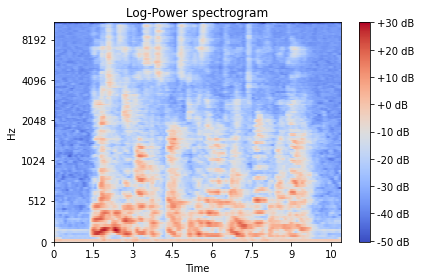

In [ ]:
plt.figure()
display.specshow(X[400, 0, :, :].numpy(), sr=16000, y_axis='mel', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Log-Power spectrogram')
plt.tight_layout()


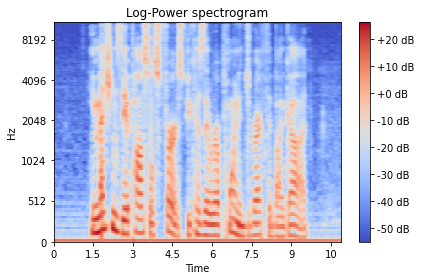

In [ ]:
plt.figure()
display.specshow(y[400, 0, :, :].numpy(), sr=16000, y_axis='mel', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Log-Power spectrogram')
plt.tight_layout()

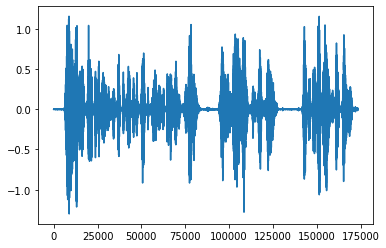

In [ ]:
import scipy
from scipy.io.wavfile import write
audio = librosa.feature.inverse.mel_to_audio(librosa.db_to_power(y[9999, 0, :, :].numpy(), ref = 5.0), sr = 16000, n_fft = 2048, hop_length = 512)
plt.plot(audio)
sf.write('/content/drive/My Drive/audio2/example.wav', audio, 16000) 

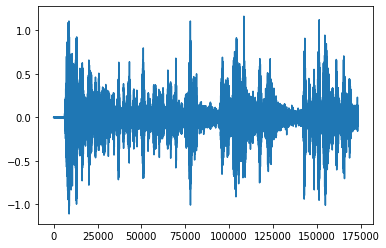

In [ ]:
import scipy
from scipy.io.wavfile import write
audio = librosa.feature.inverse.mel_to_audio(librosa.db_to_power(X[9999, 0, :, :].numpy(), ref = 5.0), sr = 16000, n_fft = 2048, hop_length = 512)
plt.plot(audio)
#write('/content/drive/My Drive/audio2/example.wav',  16000, audio.astype(np.float32))
sf.write('/content/drive/My Drive/audio2/example_rev.wav', audio, 16000) 